In [1]:
%load_ext autoreload
%autoreload 2
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import numpy as np
from LightPipes import *
from matplotlib import pyplot as plt
from juno.Simulation import generate_sq_freq_arr, propagate_over_distance
from scipy import fftpack
import pickle
from juno_custom.lattice_generation import lattice_utils

In [13]:
def calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height, realspace_x, realspace_y):
    rounded_output, propagation = propagate_over_distance(
        fft_wavefront, distance, freq_arr, wavenumber
    )
    
    plt.imshow(np.abs(rounded_output), cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
    # label x axis
    plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
    plt.xlabel("x/λ")
    # label y axis
    plt.ylabel("z/λ")
    # print(np.mean(rounded_output[np.shape(rounded_output)[0]//2, :]))
    # print(np.mean(rounded_output[rounded_output.shape[1]//2, :])/3.188232349535555e-09)
    plt.colorbar()
    plt.show()

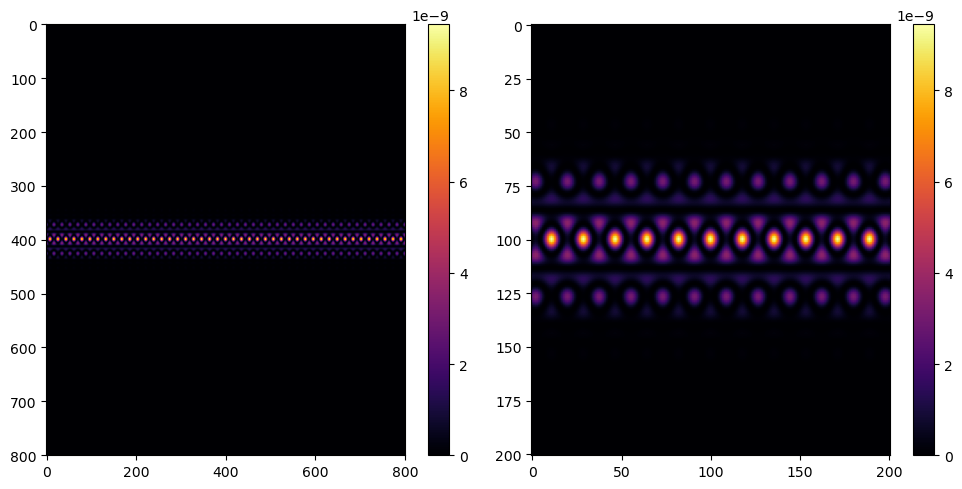

In [2]:
wavefront = np.load(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\wavefront_from_pupil.npy")
wavefront_intensity = np.abs(wavefront)**2
lattice_utils.plot_grid(wavefront_intensity, wavefront_intensity[300:501, 300:501], cmap="inferno", aspect="auto")

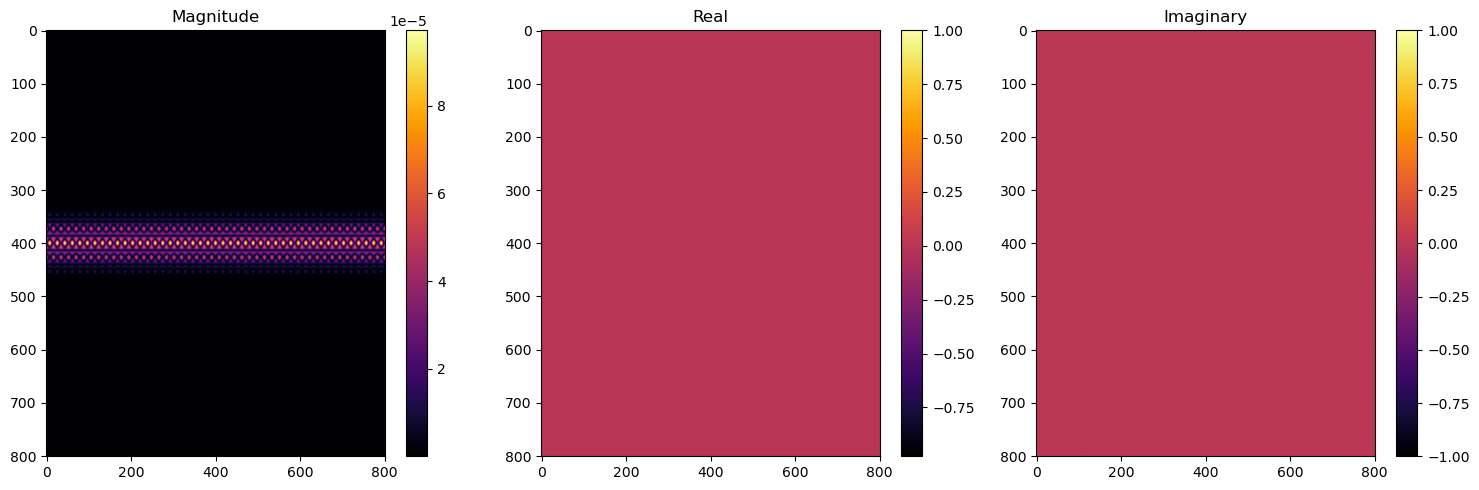

In [3]:
constant = 1
normalised_wavefront = wavefront * constant
real_part = normalised_wavefront.real
normalised_real_part = real_part / np.max(real_part)
imag_part = normalised_wavefront.imag
normalised_imag_part = imag_part / np.max(imag_part)

normalised_wavefront_magnitude = np.abs(normalised_wavefront)
# lattice_utils.plot_grid(normalised_wavefront_magnitude, normalised_wavefront_magnitude[300:501, 300:501], normalised_real_part, real_part, normalised_imag_part, imag_part, cmap="inferno", aspect="auto")
lattice_utils.plot_grid(normalised_wavefront_magnitude, normalised_real_part, normalised_imag_part, cmap="inferno", aspect="auto", titles=["Magnitude", "Real", "Imaginary"], dpi=500)

In [4]:
new_phase = normalised_wavefront_magnitude

In [5]:
new_wavefront = 1 * np.exp(1j * new_phase)
new_wavefront_mag = np.abs(new_wavefront)
new_wavefront_intensity = np.abs(new_wavefront)**2
new_wavefront_real = new_wavefront.real
new_wavefront_imag = new_wavefront.imag

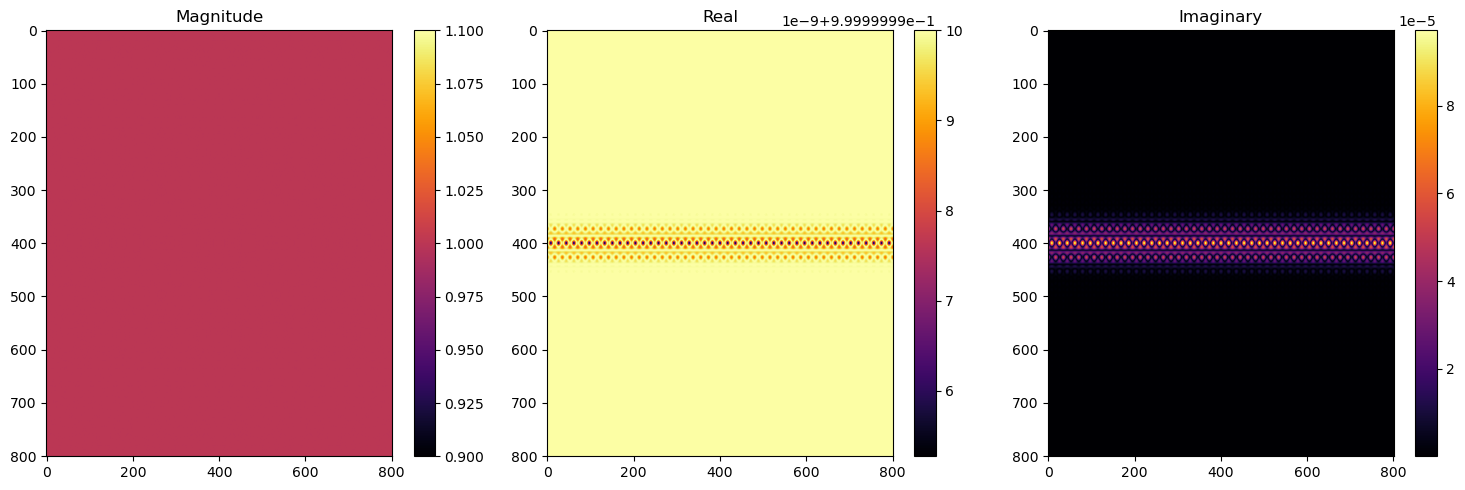

In [6]:
lattice_utils.plot_grid(new_wavefront_mag, new_wavefront_real, new_wavefront_imag, cmap="inferno", aspect="auto", titles=["Magnitude", "Real", "Imaginary"], dpi=500)
# lattice_utils.plot_grid(new_wavefront_real, new_wavefront_imag, new_wavefront_intensity, cmap="inferno", aspect="auto")

In [7]:
from copy import deepcopy
new_wavefront_real_replace = deepcopy(new_wavefront)
new_wavefront_mag = np.abs(new_wavefront_real_replace)
new_wavefront_real_replace.real = np.zeros_like(new_wavefront_real_replace.real)
new_wavefront_real_replace_imag = new_wavefront_real_replace.imag
new_wavefront_real_replace_intensity = np.abs(new_wavefront_real_replace)**2
new_wavefront_mag2 = np.abs(new_wavefront_real_replace)

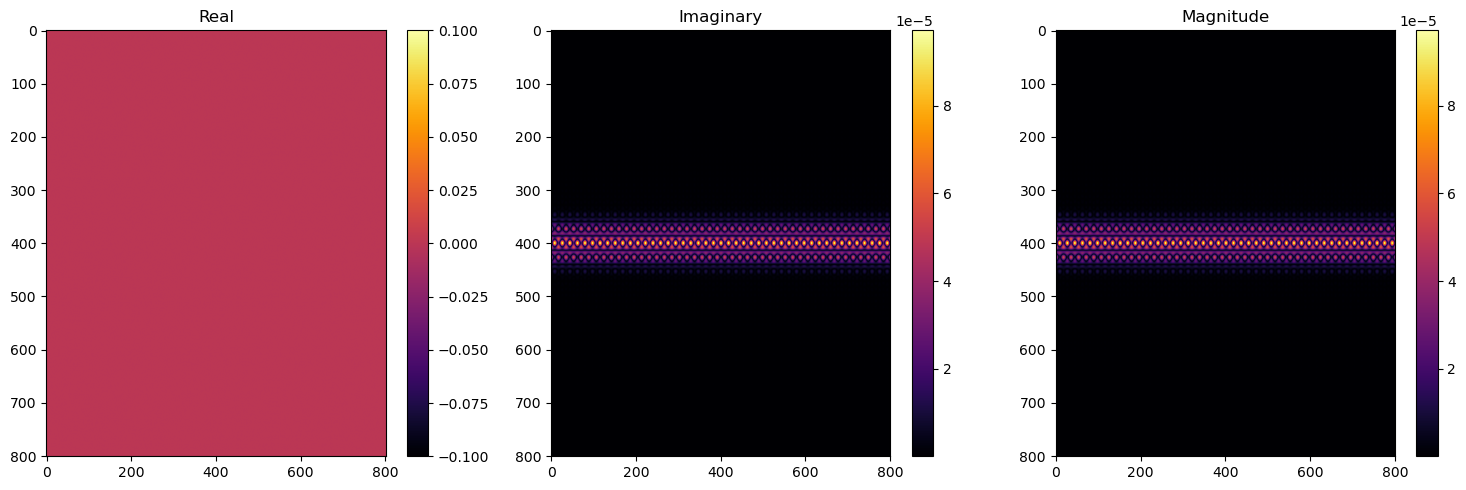

In [8]:
lattice_utils.plot_grid(new_wavefront_real_replace.real, new_wavefront_real_replace_imag, new_wavefront_mag2, cmap="inferno", aspect="auto", titles=["Real", "Imaginary", "Magnitude"], dpi=500)
# lattice_utils.plot_grid(new_wavefront_real_replace.real, new_wavefront_real_replace_imag, new_wavefront_real_replace_intensity, cmap="inferno", aspect="auto")

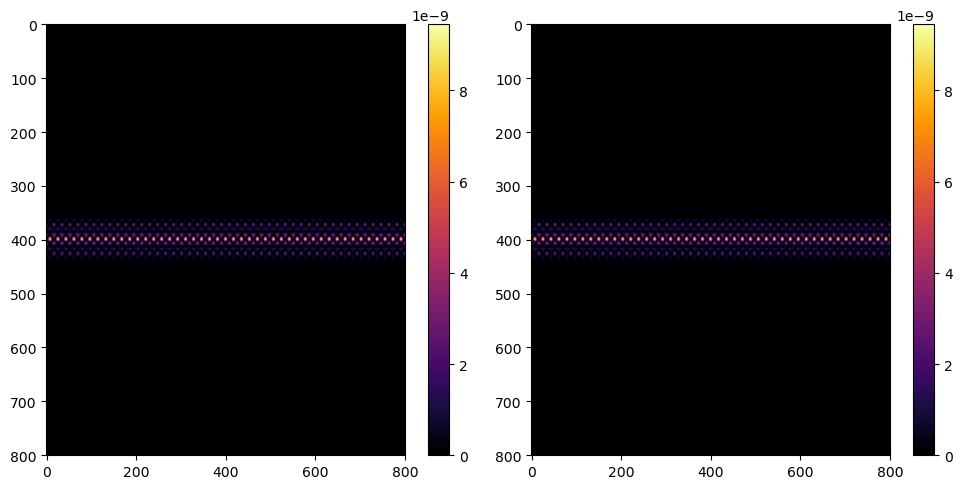

In [9]:
lattice_utils.plot_grid(new_wavefront_real_replace_intensity, wavefront_intensity, cmap="inferno", aspect="auto")

In [10]:
assert np.allclose(new_wavefront_real_replace_intensity,  wavefront_intensity)

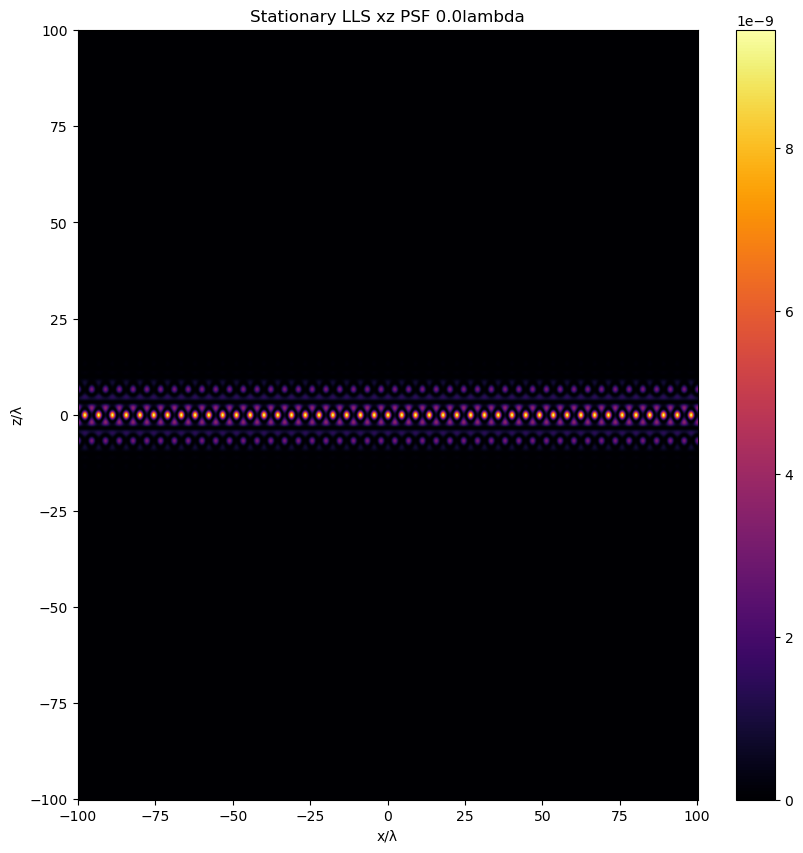

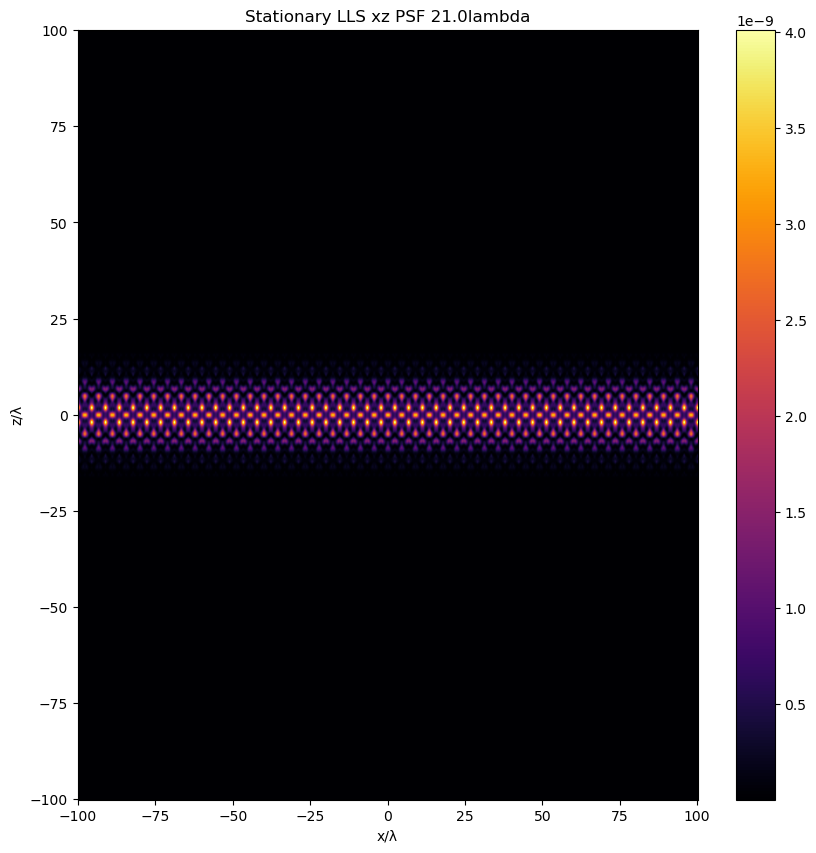

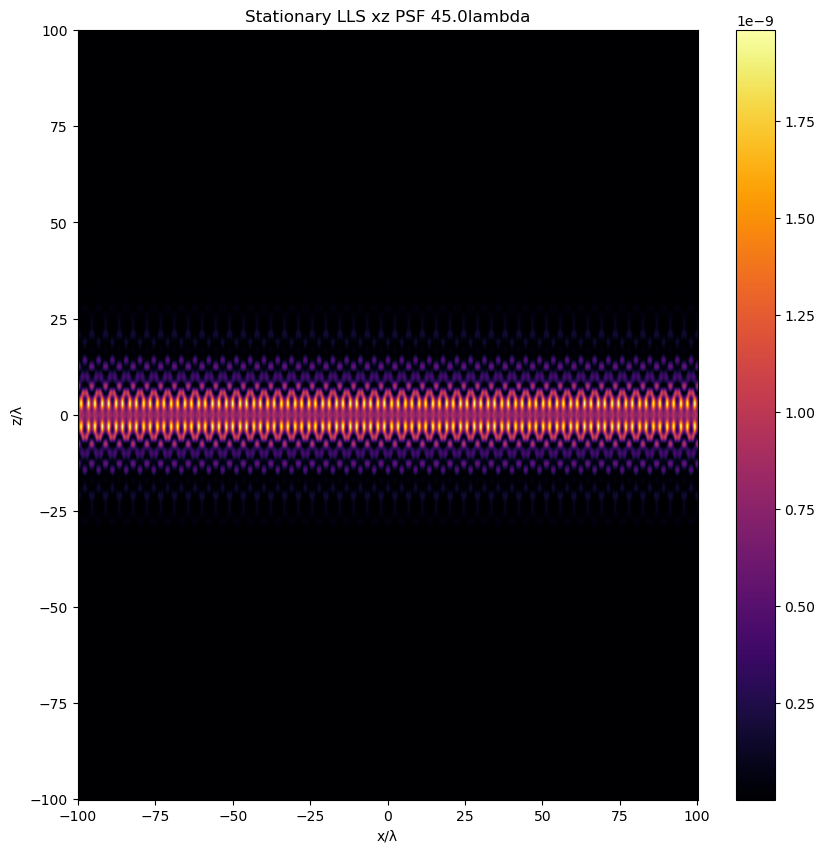

array([[1.47104960e-14, 2.92427409e-14, 8.82645674e-14, ...,
        8.82645674e-14, 2.92427409e-14, 1.47104960e-14],
       [8.89791621e-15, 2.58806504e-14, 6.58308405e-14, ...,
        6.58308405e-14, 2.58806504e-14, 8.89791621e-15],
       [8.85593236e-15, 1.44961854e-14, 3.45305390e-14, ...,
        3.45305390e-14, 1.44961854e-14, 8.85593236e-15],
       ...,
       [8.85593236e-15, 1.44961854e-14, 3.45305390e-14, ...,
        3.45305390e-14, 1.44961854e-14, 8.85593236e-15],
       [8.89791621e-15, 2.58806504e-14, 6.58308405e-14, ...,
        6.58308405e-14, 2.58806504e-14, 8.89791621e-15],
       [1.47104960e-14, 2.92427409e-14, 8.82645674e-14, ...,
        8.82645674e-14, 2.92427409e-14, 1.47104960e-14]])

In [15]:
plot_wavefront = new_wavefront_real_replace

cmap = "inferno"
n = 1.33
media_wavelength = 488.e-9 / n
wavelength = media_wavelength
pixel_size = wavelength/4
wavenumber = 2 * np.pi / wavelength 
fft_wavefront = (fftpack.fft2((new_wavefront_real_replace)))

realspace_x = new_wavefront_real_replace.shape[0] * pixel_size / wavelength
realspace_y = new_wavefront_real_replace.shape[1] * pixel_size / wavelength
freq_arr = (generate_sq_freq_arr(new_wavefront_real_replace, pixel_size))


distance = 0*wavelength
lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)
distance = 21*wavelength
lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)
distance = 45*wavelength
lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)

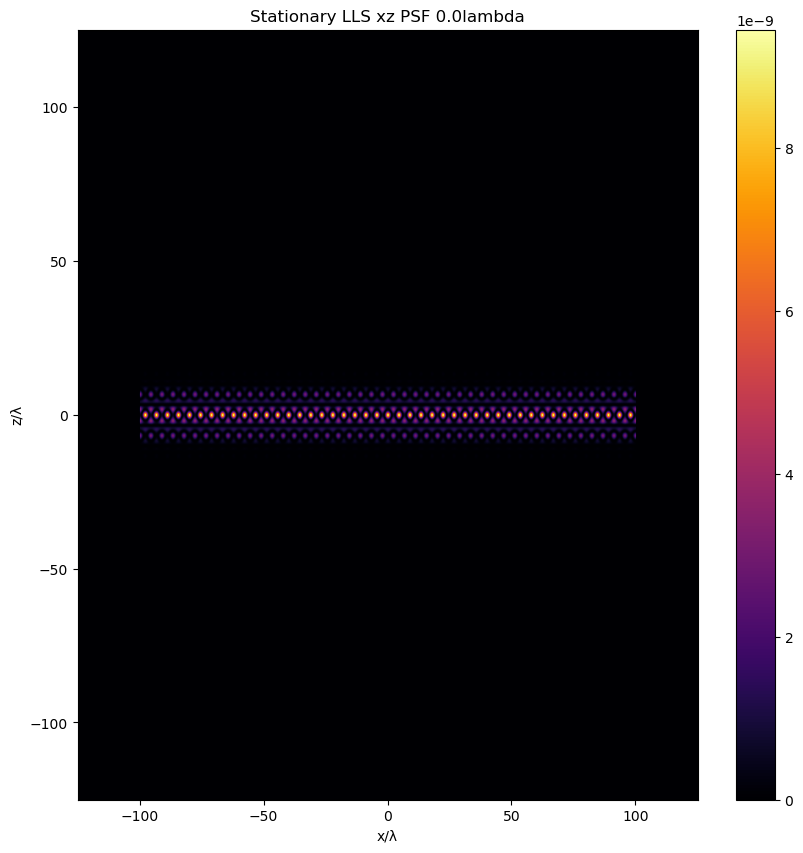

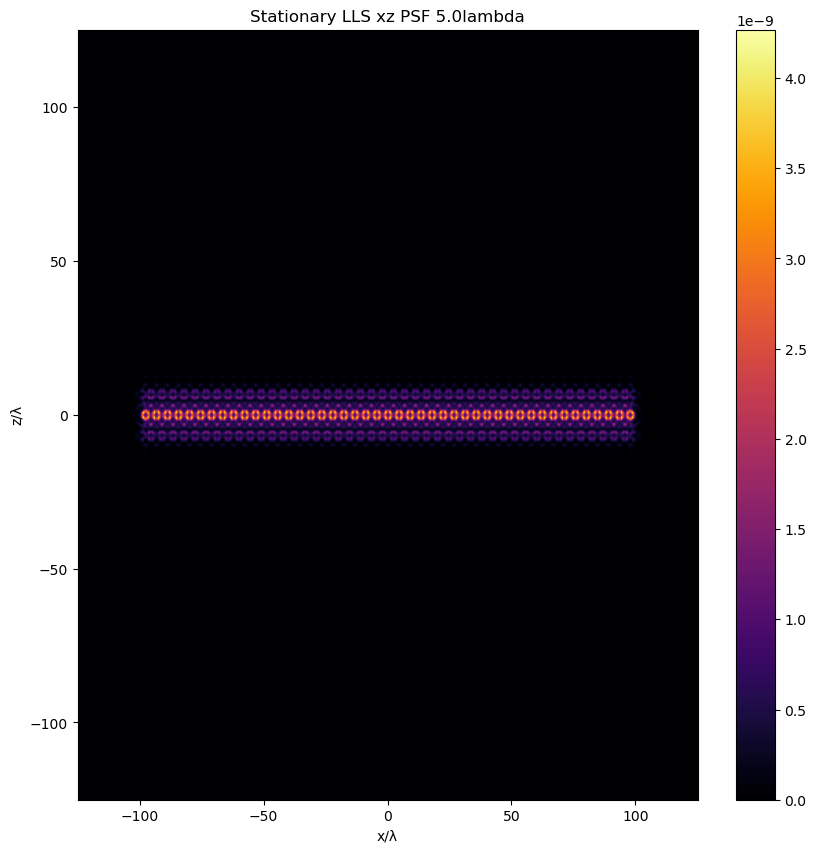

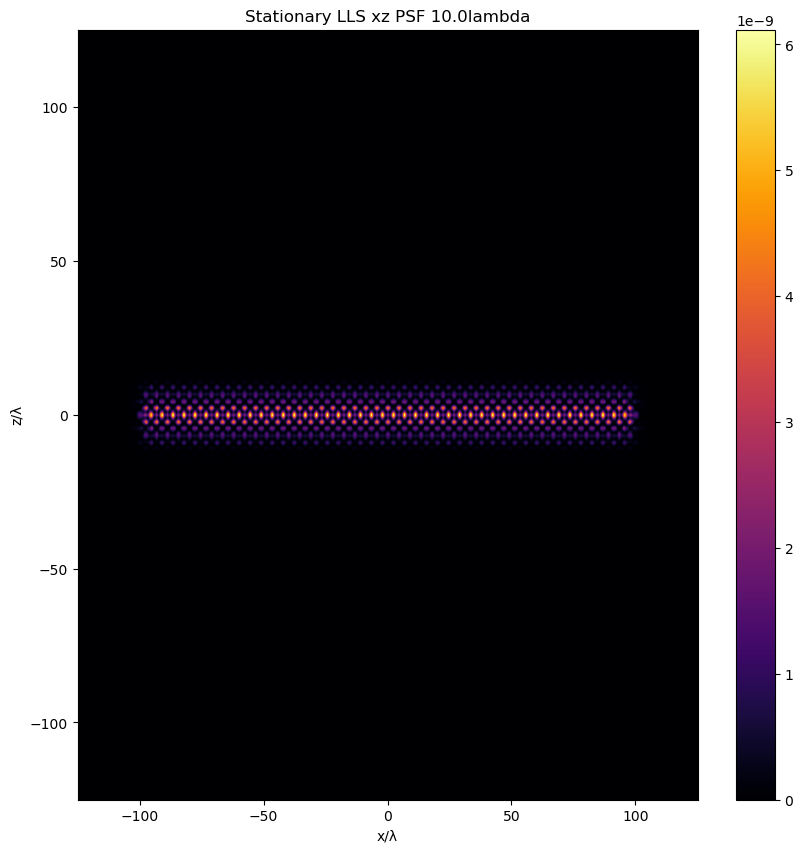

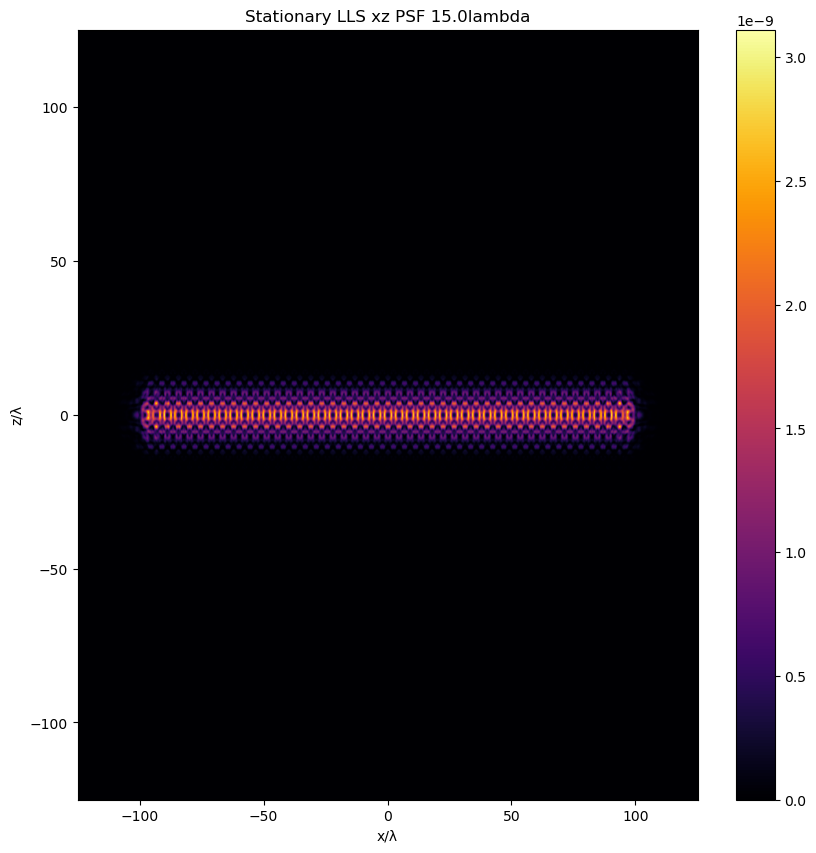

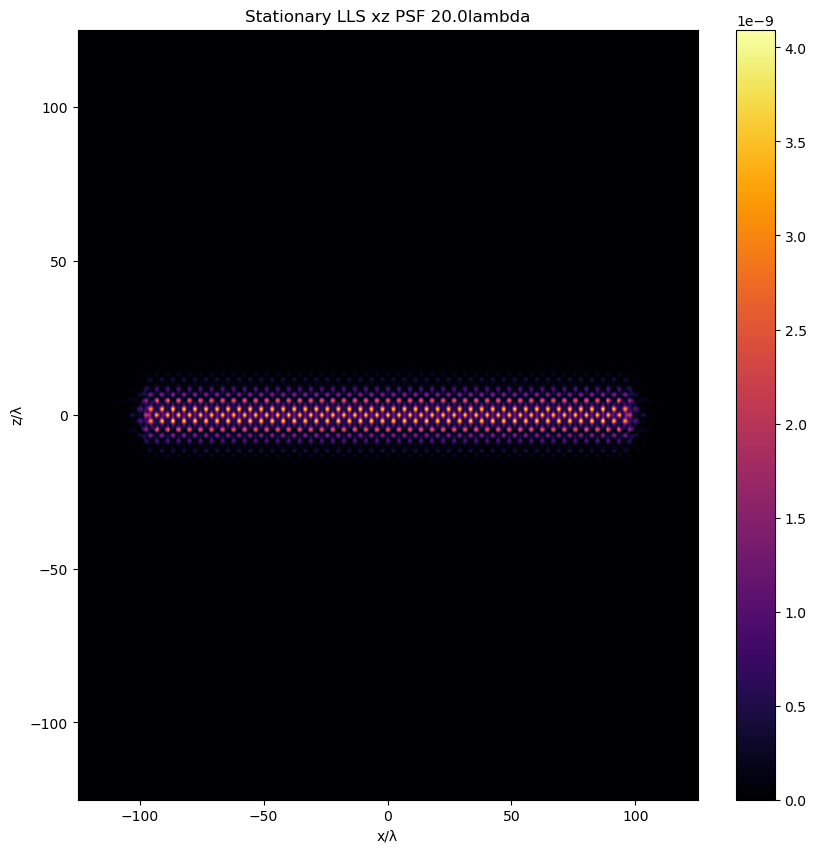

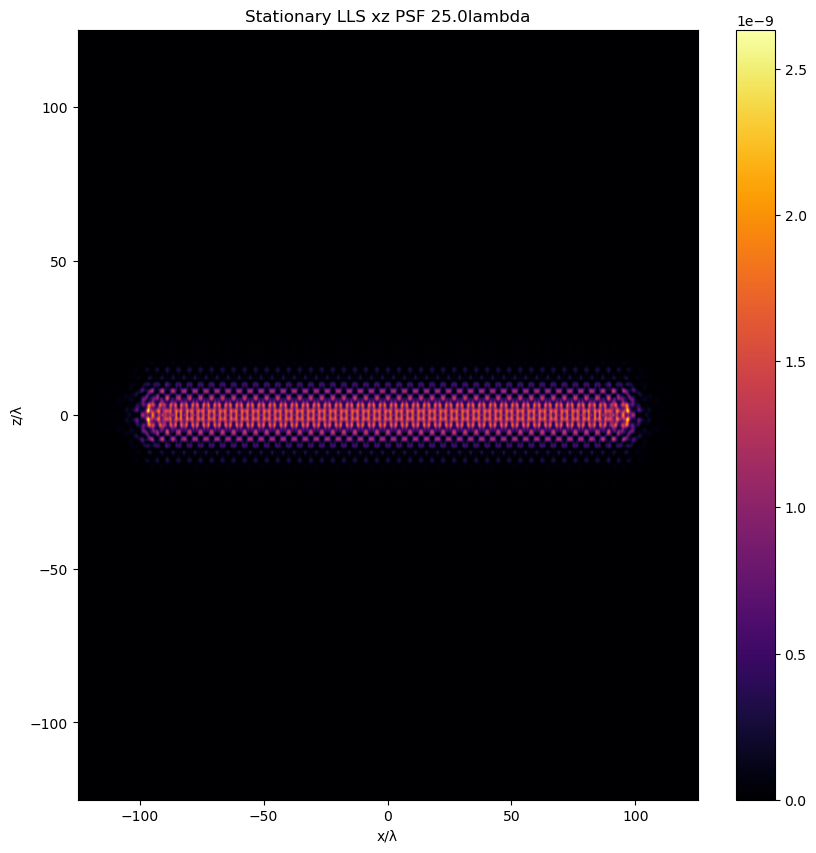

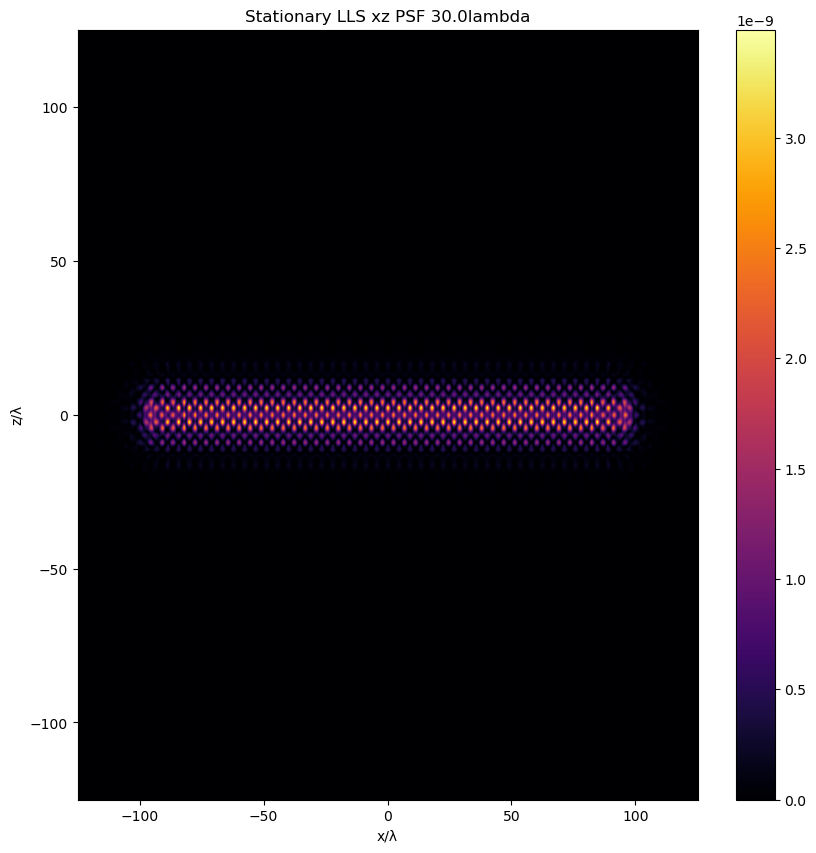

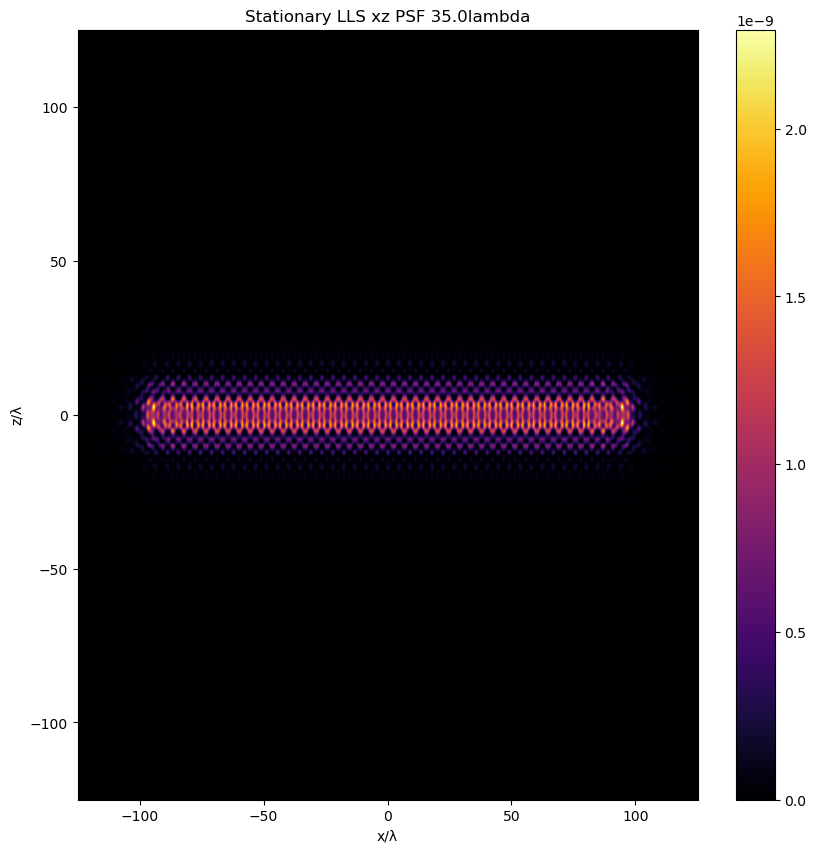

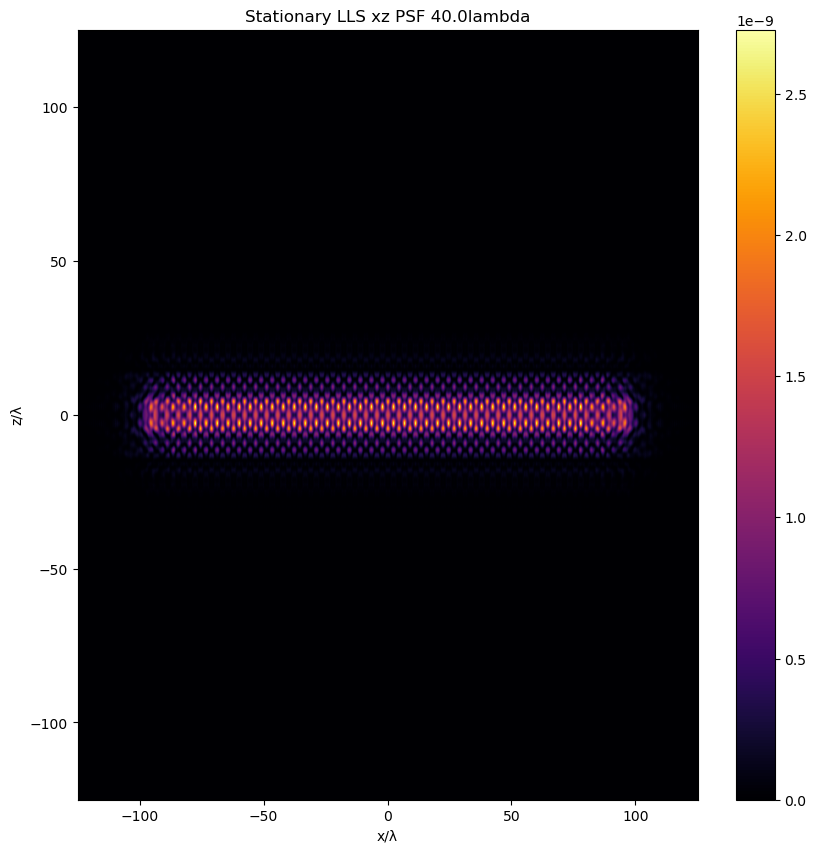

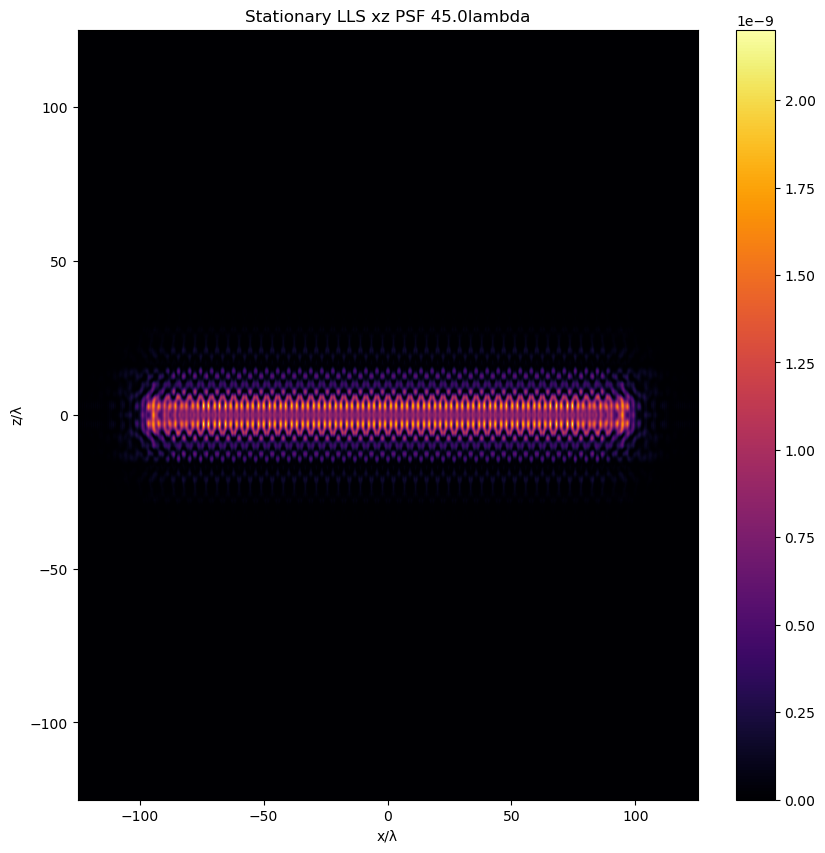

In [16]:
new_wavefront_real_replace_padded = np.pad(new_wavefront_real_replace, ((100, 100), (100, 100)), mode="constant")

cmap = "inferno"
n = 1.
media_wavelength = 488.e-9 / n
wavelength = media_wavelength
pixel_size = wavelength/4
wavenumber = 2 * np.pi / wavelength 
fft_wavefront = (fftpack.fft2((new_wavefront_real_replace_padded)))

realspace_x = new_wavefront_real_replace_padded.shape[0] * pixel_size / wavelength
realspace_y = new_wavefront_real_replace_padded.shape[1] * pixel_size / wavelength
freq_arr = generate_sq_freq_arr(new_wavefront_real_replace_padded, pixel_size)

for dist in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]:
    distance = dist * wavelength
    lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)

# distance = 0*wavelength
# calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)
# distance = 21*wavelength
# calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)
# distance = 45*wavelength
# calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y)

In [ ]:
with open(r"C:\Users\User\Github\LLS_Simulation\PlotSLMPhase.pkl", "rb") as f:
    phase_SLM = pickle.load(f)
phase_SLM = 1 - phase_SLM
phase_SLM *= 255 

# phase_SLM = phase_SLM * (2 * np.pi / wavelength)

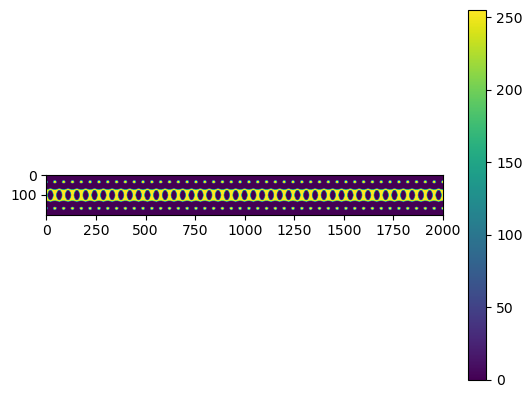

In [ ]:
# wavefront_SLM =  1 * np.exp(1j * phase_SLM)
# plt.imshow(phase_SLM, cmap="gray", aspect="auto")
# plt.colorbar()

# plt.show()
# plt.imshow(np.angle(wavefront_SLM), cmap="gray", aspect="auto")
# plt.colorbar()

phase_int = phase_SLM[900:1100, :]
plt.imshow(phase_int)
plt.colorbar()
plt.show()
# save phase_int
np.save(r"C:\Users\User\Github\juno_custom\juno_custom\saved_arrays\phase_int.npy", phase_int)

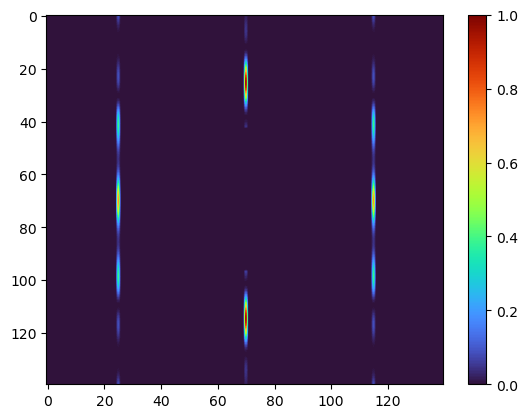

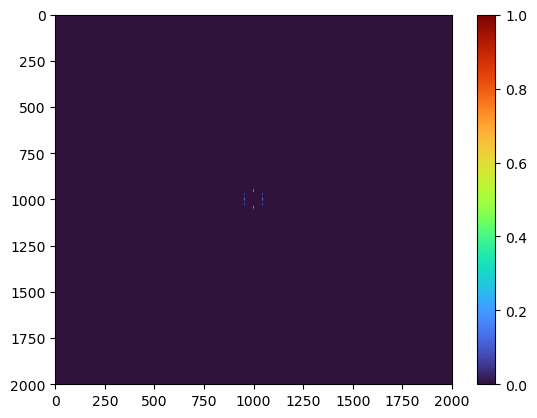

In [ ]:
idiff = fft2(wavefront_SLM)
idiff = fftshift(idiff)
cy, cx = idiff.shape[0]//2, idiff.shape[1]//2
idiff[cy-27:cy+27, cx] = 0
idiff /= idiff.max()
step = 70
intensity_diff = np.abs(idiff)**2

intensity_cutoff = np.zeros(intensity_diff.shape)
intensity_cutoff[cy-step:cy+step,cx-step:cx+step] = intensity_diff[cy-step:cy+step,cx-step:cx+step]

plt.imshow(intensity_diff[cy-step:cy+step,cx-step:cx+step], cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(intensity_cutoff, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()


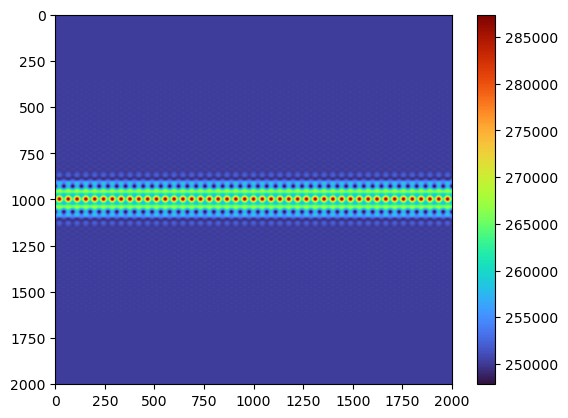

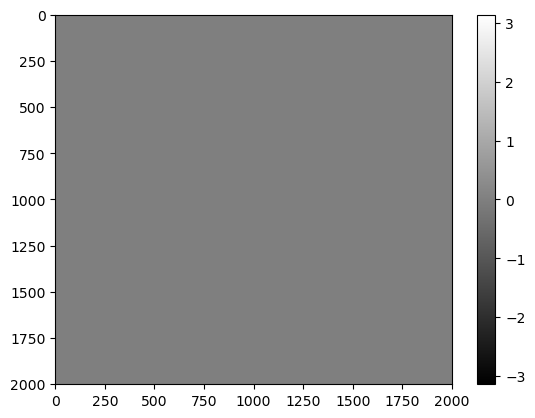

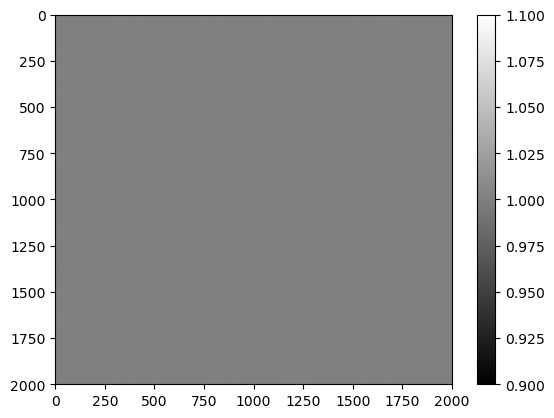

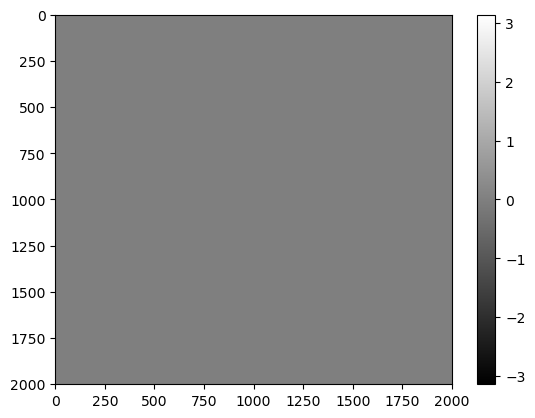

In [ ]:
fft_idiff = fftshift(fft2(intensity_cutoff))
plt.imshow(np.abs(fft_idiff)**2, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

# plt.imshow(np.angle(fft_idiff))
# plt.colorbar()
# plt.show()

new_phase = np.real(fft_idiff)
new_phase = new_phase/new_phase.max() * np.pi
plt.imshow(new_phase, cmap="gray", aspect="auto")
plt.colorbar()
plt.show()
new_wavefront = 1 * np.exp(1j * new_phase)

plt.imshow(np.abs(new_wavefront)**2, cmap="gray", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(np.angle(new_wavefront), cmap="gray", aspect="auto")
plt.colorbar()
plt.show()


In [ ]:
phase_SLM *= 1e13

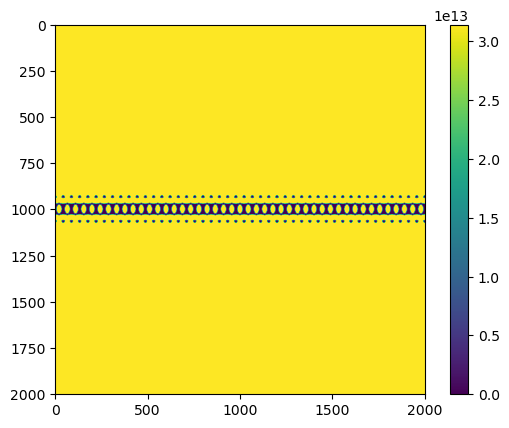

In [ ]:
plt.imshow(phase_SLM)
wavefront_SLM = np.exp(1j * phase_SLM)
plt.colorbar()

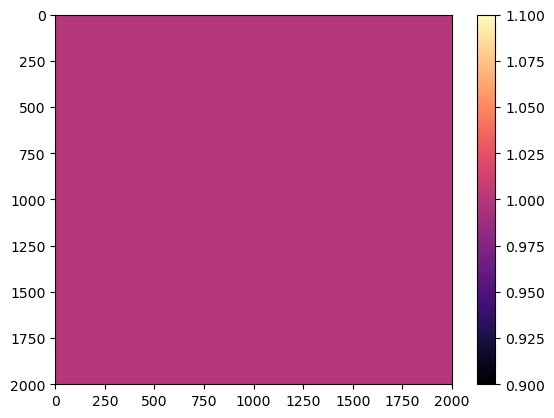

In [ ]:
plt.imshow(np.abs(wavefront_SLM)**2, cmap="magma", aspect="auto")
plt.colorbar()

In [ ]:
with open(r"C:\Users\User\Github\LLS_Simulation\Efield.pkl", "rb") as f:
    efield = pickle.load(f)

efield = efield*np.pi

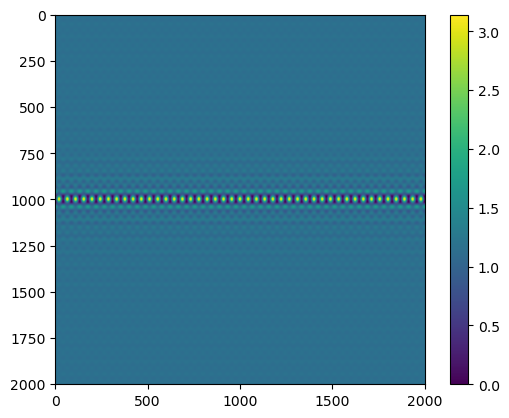

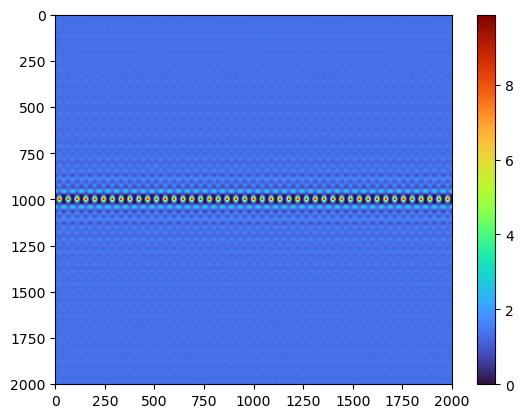

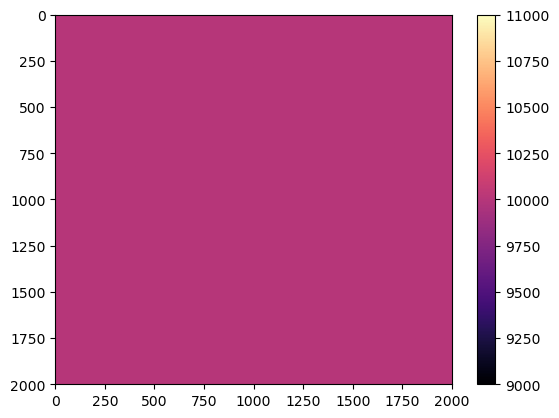

In [ ]:
plt.imshow(efield)

plt.colorbar()
plt.show()

plt.imshow(np.abs(efield)**2,cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()
newest_wavefront = 100 * np.exp(1j * efield)

plt.imshow(np.abs(newest_wavefront)**2, cmap="magma", aspect="auto")
plt.colorbar()


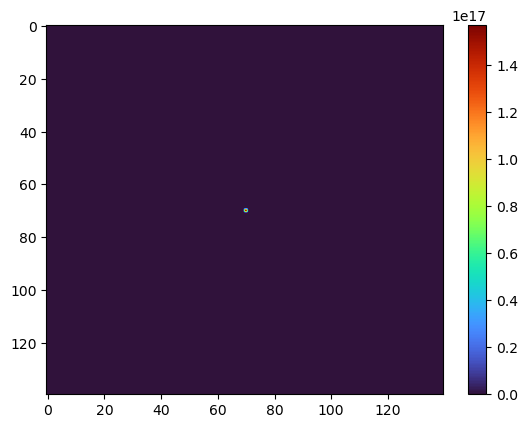

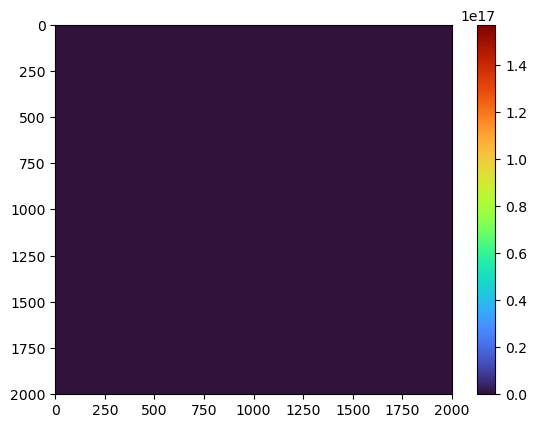

In [ ]:
ediff = fft2(newest_wavefront)
ediff = fftshift(ediff)
cy, cx = ediff.shape[0]//2, ediff.shape[1]//2
# ediff[cy-27:cy+27, cx] = 0
# ediff /= ediff.max()
step = 70
intensity_diff = np.abs(ediff)**2

intensity_cutoff = np.zeros(intensity_diff.shape)
intensity_cutoff[cy-step:cy+step,cx-step:cx+step] = intensity_diff[cy-step:cy+step,cx-step:cx+step]

plt.imshow(intensity_diff[cy-step:cy+step,cx-step:cx+step], cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(intensity_cutoff, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()


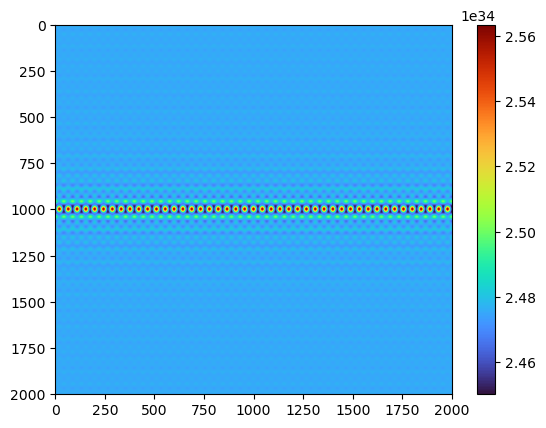

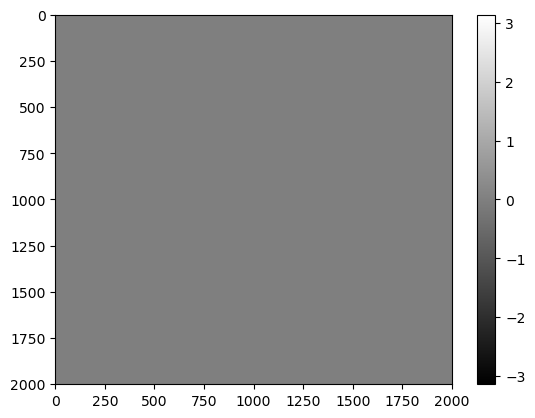

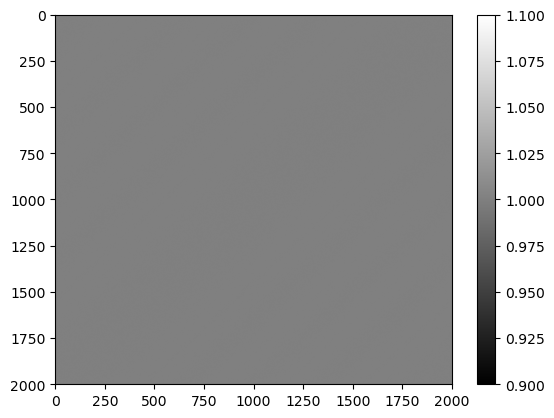

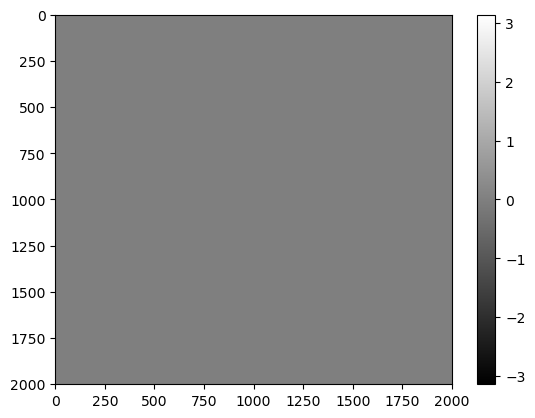

In [ ]:
fft_idiff = fftshift(fft2(intensity_cutoff))
plt.imshow(np.abs(fft_idiff)**2, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

# plt.imshow(np.angle(fft_idiff))
# plt.colorbar()
# plt.show()

new_phase = np.real(fft_idiff)
new_phase = new_phase/new_phase.max() * np.pi
plt.imshow(new_phase, cmap="gray", aspect="auto")
plt.colorbar()
plt.show()
new_wavefront = 1 * np.exp(1j * new_phase)

plt.imshow(np.abs(new_wavefront)**2, cmap="gray", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(np.angle(new_wavefront), cmap="gray", aspect="auto")
plt.colorbar()
plt.show()


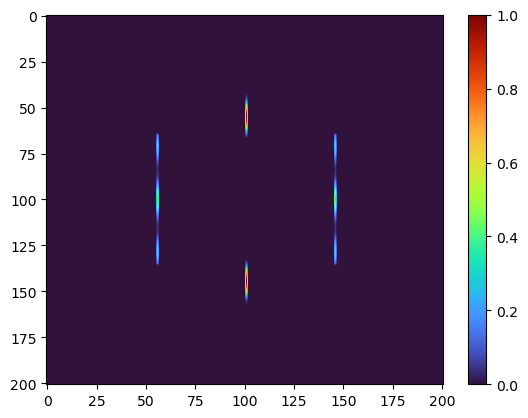

In [ ]:
plt.imshow(data[300:501, 300:501], cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
fft_data = fftshift(ifft2(data))

In [ ]:
cmap = "inferno"
n = 1.33
media_wavelength = 488.e-9 / n
wavelength = media_wavelength
pixel_size = wavelength / 4
wavenumber = 2 * np.pi / wavelength 
fft_wavefront = fftshift(fftpack.fft2((fft_data)))

realspace_x = fft_data.shape[0] * pixel_size / wavelength
realspace_y = fft_data.shape[1] * pixel_size / wavelength

freq_arr = generate_sq_freq_arr(fft_data, pixel_size)

# center_y, center_x = np.shape(rounded_output)[0]//2, np.shape(rounded_output)[1]//2

def calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap):
    rounded_output, propagation = propagate_over_distance(
        fft_wavefront, distance, freq_arr, wavenumber
    )
    
    plt.imshow(rounded_output, cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
    plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
    plt.xlabel("x/λ")
    plt.ylabel("z/λ")
    plt.colorbar()
    plt.show()
    return rounded_output


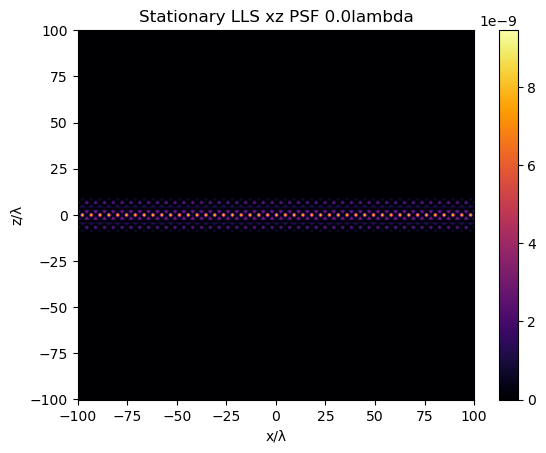

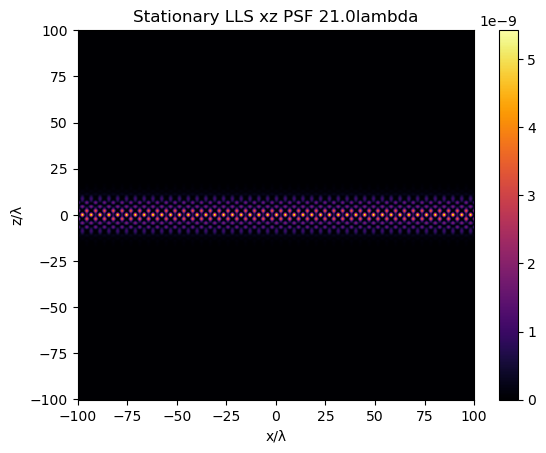

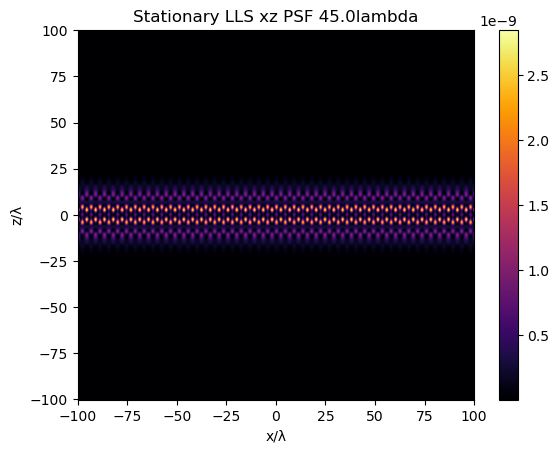

array([[1.06240314e-13, 8.25728316e-14, 4.63811498e-14, ...,
        4.63811498e-14, 8.25728316e-14, 1.06240314e-13],
       [7.64493973e-14, 5.94373607e-14, 3.34203677e-14, ...,
        3.34203677e-14, 5.94373607e-14, 7.64493973e-14],
       [4.23115030e-14, 3.29192067e-14, 1.85522453e-14, ...,
        1.85522453e-14, 3.29192067e-14, 4.23115030e-14],
       ...,
       [1.01046405e-13, 7.85395728e-14, 4.41221980e-14, ...,
        4.41221980e-14, 7.85395728e-14, 1.01046405e-13],
       [1.20734052e-13, 9.38273062e-14, 5.26837358e-14, ...,
        5.26837358e-14, 9.38273062e-14, 1.20734052e-13],
       [1.22659799e-13, 9.53225968e-14, 5.35210025e-14, ...,
        5.35210025e-14, 9.53225968e-14, 1.22659799e-13]])

In [ ]:

distance = 0*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap)
distance = 21*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap)
distance = 45*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap)

In [ ]:
print(fft_data.shape)

(801, 801)


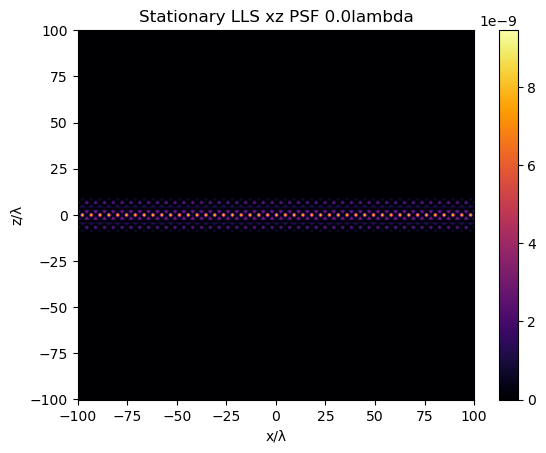

In [ ]:
distance = 0*wavelength
output = calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height)


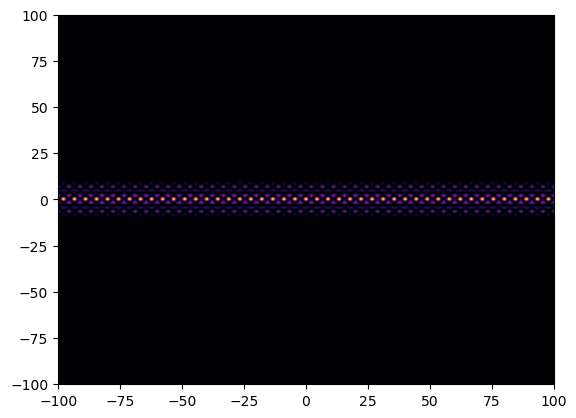

In [ ]:
plt.imshow(np.abs(output), cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])

In [ ]:
l = 488e-9
n = 24
for n in range(30)[-20:]:
        
    h = l*(0.5 + n)/(2.348-1)
    print(h)

3.8011869436201788e-06
4.163204747774482e-06
4.525222551928784e-06
4.887240356083087e-06
5.24925816023739e-06
5.611275964391692e-06
5.973293768545994e-06
6.335311572700298e-06
6.6973293768546e-06
7.059347181008903e-06
7.4213649851632065e-06
7.783382789317508e-06
8.145400593471812e-06
8.507418397626114e-06
8.869436201780416e-06
9.23145400593472e-06
9.593471810089022e-06
9.955489614243324e-06
1.0317507418397628e-05
1.067952522255193e-05
